<a href="https://colab.research.google.com/github/caduarte989/soulcode/blob/main/airbnb_Camila_Duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Período: Semana 6

Professora: Franciane Rodrigues

Monitor: Jonathas Carneiro

Aluna: Camila Ananda Duarte

# **Descrição do Projeto**


Pergunta de negócio: Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.


Requisitos Obrigatórios:
* Verificar todos os passos da estratégia geral de análise de dados;
* Executar o que for necessário;
* Todos os passos devem ser comentados;
* Realizar no mínimo 3 análises apenas numéricas;
* Realizar plotagens para no mínimo 3 análises;
* Chegar a uma conclusão de sua análise;


#**Informações gerais**

A base de dados abaixo é referente ao de aluguel do Airbnb para cidades europeias. A Análise será feita levando em consideração que algumas características podem interferir nas possíveis escolhas dos hóspedes em potencial.

* **Fontes de pesquisas:**

https://brasil.elpais.com/brasil/2018/01/28/economia/1517154558_107147.html

https://quantocustaviajar.com/blog/cidades-que-estao-limitando-o-airbnb/

## **Instalação de Pacotes e Bibliotecas**

In [ ]:
#Instalação e importação de bibliotecas
!pip install gcsfs
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
#Instalação e importação de bibliotecas
import os
import pandas as pd
import numpy as np
import pandera as pa
from google.cloud import storage

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade de colunas para aparecer em um Datraframe
pd.set_option('display.max_columns',100)

## **Extração via GCP**

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/aprendendocloud-390016-3ecbabfe1d77.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projetos-ad2-caduarte')           # nome da bucket
bucket.blob('airbnb_bruto.csv')                               # nome do arquivo
path = 'gs://projetos-ad2-caduarte/brutos/airbnb_bruto.csv'   # gsutil

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path)
dfback = df.copy()

In [ ]:
#Extração via Google Cloud
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/BootcampSoulCode/airbnb_bruto.csv')

# **Dicionário da base de dados:**
*   realSum: preço total;  
*   room_shared: se o quarto é compartilhado ou não;
*   room_private: se o quarto é privativo ou não;
*   person_capacity: número máximo de pessoas permitidas na propriedade;
*   host_is_superhost: se o host é ou não um superhost;
*   multi: tem vários quartos ou não;
*   person_capacity: número máximo de pessoas permitidas na propriedade;
*   host_is_superhost: se o host é ou não um superhost;
*   multi: tem vários quartos ou não;
*   biz: seja para uso comercial ou familiar;
*   cleanliness_rating: Classificação de limpeza;
*   guest_satisfaction_overall: satisfação geral do hóspede
*   bedrooms: número de quartos;
*   dist: a distância do centro da cidade;
*   metro_dist: distância da estação de metro mais próxima em km;
*   attr_index: índice de atração do local do anúncio;
*   attr_index_norm: índice de atracção normalizado (0-100);
*   rest_index:índice de restaurantes do local do anúncio;
*   rest_index_norm: índice de restaurantes normalizado (0-100);
*   lng: Longitude
*   lat: Latitude

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
dfback1 = df.copy()

## **Pré-Análise**

In [ ]:
#visualização do Dataframe após o backup1
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
#Tamando do Dataframe (linhas,colunas)
df.shape

(1103, 20)

# Transformação

In [ ]:
# Retirando a coluna Unnamed
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
#verificando o tipo de dado em cada coluna
df.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
#verificação da retirada da coluna Unnamed
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [ ]:
#Tradução das colunas para melhor interpretação
df.rename(columns={'realSum':'preço_total',
                   'room_type':'tipo_quarto',
                   'room_shared':'compartilhado',
                   'room_private':'quarto_privativo',
                   'person_capacity':'capacidade',
                   'host_is_superhost':'Superhost',
                   'multi':'múltiplos_quartos',
                   'biz':'Uso comercial ou familiar',
                   'cleanliness_rating':'nota_limpeza',
                   'guest_satisfaction_overall':'satisfacao',
                   'bedrooms':'quartos',
                   'dist':'distancia_centro',
                   'metro_dist':'distancia_metrô',
                   'attr_index': 'índice de atração do local do anúncio',
                   'attr_index_norm' : 'índice de atracção normalizado (0-100)',
                   'rest_index' : 'índice de restaurantes do local do anúncio',
                   'rest_index_norm' : 'índice de restaurantes normalizado (0-100)',
                   'lat':'latitude',
                   'lng':'longitude'})




,preço_total,tipo_quarto,compartilhado,quarto_privativo,capacidade,Superhost,múltiplos_quartos,Uso comercial ou familiar,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metrô,índice de atração do local do anúncio,índice de atracção normalizado (0-100),índice de restaurantes do local do anúncio,índice de restaurantes normalizado (0-100),longitude,latitude
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
#Certificando que a tradução foi realizada
df.rename(columns={'realSum':'preço_total',
                   'room_type':'tipo_quarto',
                   'room_shared':'compartilhado',
                   'room_private':'quarto_privativo',
                   'person_capacity':'capacidade',
                   'host_is_superhost':'Superhost',
                   'multi':'múltiplos_quartos',
                   'biz':'Uso comercial ou familiar',
                   'cleanliness_rating':'nota_limpeza',
                   'guest_satisfaction_overall':'satisfacao',
                   'bedrooms':'quartos',
                   'dist':'distancia_centro',
                   'metro_dist':'distancia_metrô',
                   'attr_index': 'índice de atração do local do anúncio',
                   'attr_index_norm' : 'índice de atracção normalizado (0-100)',
                   'rest_index' : 'índice de restaurantes do local do anúncio',
                   'rest_index_norm' : 'índice de restaurantes normalizado (0-100)',
                   'lat':'latitude',
                   'lng':'longitude'}, inplace = True)

In [ ]:
#verificando a tradução
df

,preço_total,tipo_quarto,compartilhado,quarto_privativo,capacidade,Superhost,múltiplos_quartos,Uso comercial ou familiar,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metrô,índice de atração do local do anúncio,índice de atracção normalizado (0-100),índice de restaurantes do local do anúncio,índice de restaurantes normalizado (0-100),longitude,latitude
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
#verificando se as colunas sao iguais
colunas_verificar =['preço_total',
                    'tipo_quarto',
                    'compartilhado',
                    'quarto_privativo',
                    'capacidade',
                    'Superhost',
                    'múltiplos_quartos',
                    'Uso comercial ou familiar',
                    'nota_limpeza',
                    'satisfacao',
                    'quartos',
                    'distancia_centro',
                    'distancia_metrô',
                    'índice de atração do local do anúncio',
                    'índice de atracção normalizado (0-100)',
                    'índice de restaurantes do local do anúncio',
                    'índice de restaurantes normalizado (0-100)',
                    'longitude',
                    'latitude'],
for coluna in colunas_verificar:
  if df['preço_total'].equals(df[coluna]):
    print (f"A coluna {coluna} é igual à  coluna 'preço_total'.")
  else:
    print ('As colunas são diferentes')

As colunas são diferentes


In [ ]:
#Verificando informações detalhadas do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   preço_total                                 1103 non-null   float64
 1   tipo_quarto                                 1103 non-null   object 
 2   compartilhado                               1103 non-null   bool   
 3   quarto_privativo                            1103 non-null   bool   
 4   capacidade                                  1103 non-null   float64
 5   Superhost                                   1103 non-null   bool   
 6   múltiplos_quartos                           1103 non-null   int64  
 7   Uso comercial ou familiar                   1103 non-null   int64  
 8   nota_limpeza                                1103 non-null   float64
 9   satisfacao                                  1103 non-null   float64
 10  quartos     

In [ ]:
#traduzindo valores do atributo tipo_quarto
df.loc[df.tipo_quarto == 'Private room',['tipo_quarto']] = 'Quarto privado'

In [ ]:
# Traduzindo as outras informações da coluna através de um dicionario.
traducao_tipo_quarto = {
    'Entire home/apt': 'Apt/casa inteira',
    'Shared room': 'Quarto compartilhado'
}

In [ ]:
# Usando metodo replace para traduzir os termos da coluna 'tipo_quarto'
df['tipo_quarto'].replace(traducao_tipo_quarto,inplace=True)

In [ ]:
#checando a tradução da coluna
df.groupby(['tipo_quarto']).size()

tipo_quarto
Apt/casa inteira        538
Quarto compartilhado      6
Quarto privado          559
dtype: int64

In [ ]:
#verificando valores únicos.
colunas_quali = df[['tipo_quarto','compartilhado','Superhost']]

for coluna in colunas_quali:
  atributos_unicos = df[coluna].unique()
  print(f"Atributos únicos na coluna {coluna}:")
  for atributo in atributos_unicos:
    print(atributo)


Atributos únicos na coluna tipo_quarto:
Quarto privado
Apt/casa inteira
Quarto compartilhado
Atributos únicos na coluna compartilhado:
False
True
Atributos únicos na coluna Superhost:
False
True


In [ ]:
# Verificar dados nulos, ausentes, incorretos
df.isna().sum()

preço_total                                   0
tipo_quarto                                   0
compartilhado                                 0
quarto_privativo                              0
capacidade                                    0
Superhost                                     0
múltiplos_quartos                             0
Uso comercial ou familiar                     0
nota_limpeza                                  0
satisfacao                                    0
quartos                                       0
distancia_centro                              0
distancia_metrô                               0
índice de atração do local do anúncio         0
índice de atracção normalizado (0-100)        0
índice de restaurantes do local do anúncio    0
índice de restaurantes normalizado (0-100)    0
longitude                                     0
latitude                                      0
dtype: int64

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['preço_total'])))

[128.88711831837463, 143.65055187120663, 144.82225294682823, 161.9290886509034, 165.67853209289248, 167.3189135987627, 175.75516134323811, 177.16120263398403, 178.0985634944813, 180.20762543060016, 181.8480069364704, 184.4257493028379, 188.17519274482692, 191.6902959716917, 192.8619970473133, 194.03369812293488, 196.6114404893024, 198.9548426405456, 199.89220350104284, 201.53258500691305, 202.70428608253465, 204.1103273732805, 205.2820284489021, 206.4537295245237, 208.7971316757669, 209.03147189089125, 210.2031729665128, 213.95261640850188, 215.12431748412348, 217.70205985049097, 218.63942071098825, 218.8737609261125, 221.2171630773557, 221.45150329248003, 225.66962716471772, 227.310008670588, 228.71604996133388, 230.82511189745276, 232.23115318819865, 233.63719447894456, 234.57455533944184, 237.85531835118223, 238.3239987814309, 239.4956998570525, 239.7300400721768, 241.1360813629227, 241.83910200829567, 242.07344222342, 243.2451432990416, 244.4168443746632, 245.5885454502848, 245.822

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['tipo_quarto'])))

['Apt/casa inteira', 'Quarto compartilhado', 'Quarto privado']


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['quarto_privativo'])))

[False, True]


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['capacidade'])))

[2.0, 3.0, 4.0, 5.0, 6.0]


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['Superhost'])))

[False, True]


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['múltiplos_quartos'])))

[0, 1]


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['Uso comercial ou familiar'])))

[0, 1]


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['nota_limpeza'])))

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['satisfacao'])))

[20.0, 47.0, 60.0, 65.0, 70.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['quartos'])))

[0, 1, 2, 3, 4, 5]


In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['distancia_centro'])))

[0.0150587980705548, 0.099653501265351, 0.11480567677719, 0.1228203248413586, 0.1386645584328363, 0.1613319628315826, 0.1673131477644722, 0.1757999097494184, 0.1847578358707701, 0.1885288278893922, 0.1951980501873343, 0.218366101609283, 0.2224653424234426, 0.2272606763176075, 0.2403669761183767, 0.2613177343616277, 0.2645439121022677, 0.2726701727182661, 0.2746367615057592, 0.2754348902526141, 0.2802043670336476, 0.2802081671693026, 0.2804455866459713, 0.2862270363942465, 0.2872028149662998, 0.2877071439287178, 0.2895266515672745, 0.290728499113068, 0.2963133809226728, 0.2974726347767152, 0.2988822359077754, 0.3345436175529303, 0.3362210405432312, 0.3379457651761013, 0.3396755797229193, 0.3428061638767657, 0.345523840742521, 0.3530819578031284, 0.3537205344170818, 0.3605068051816017, 0.3633454412498557, 0.3639339290695795, 0.3700082752668438, 0.3714395451909041, 0.3720313749795971, 0.3751350635549438, 0.3846115997106273, 0.384862012821602, 0.3940358562606905, 0.3971287274991505, 0.3983

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['distancia_metrô'])))

[0.0365299349690898, 0.0383546937010648, 0.0452202367146166, 0.0484628244968149, 0.0510521030736588, 0.0549307888656383, 0.0567934111340297, 0.0568915518360108, 0.0576981436516522, 0.0687184318413499, 0.0708805340183559, 0.0752365553720472, 0.0779166156732898, 0.0837770875750669, 0.1007740057793931, 0.1012318191726814, 0.1051871237368232, 0.1068345836161703, 0.1073010915114232, 0.1089403915386729, 0.1112526778129059, 0.1129651468266271, 0.119528106734041, 0.1210290090382624, 0.1220813873662373, 0.1245077819423133, 0.1256081740720538, 0.1266261912071032, 0.1269511243741907, 0.1304376878811783, 0.134728523844149, 0.1432629485982863, 0.1459595422340796, 0.147342513212529, 0.1504065294975317, 0.1530381646078639, 0.1534425610558035, 0.1548958309412227, 0.1572362826184581, 0.1581548155442651, 0.1659570897955379, 0.1661690453846391, 0.1673273754409381, 0.1733919684462981, 0.175794704274626, 0.176270148154478, 0.178057071188013, 0.1807682543430058, 0.1816822906160285, 0.1831750782063814, 0.186

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['índice de atração do local do anúncio'])))

[40.93141537073684, 41.27584675384424, 41.34581473923222, 41.64218464090962, 42.0102315706286, 42.02512118821275, 42.64524543570329, 42.95105420164763, 43.90667927503085, 44.05838786563618, 44.29696585107931, 44.771650014593234, 44.85911648685495, 45.16045440505382, 45.3688668005636, 45.54853867647846, 47.31284445405976, 47.54895279345339, 48.69267325178657, 49.07298752535878, 49.325672596659565, 49.41980099625926, 49.86553412435642, 50.30646945995107, 51.35051853062935, 52.51551063768717, 52.56307588103194, 52.68068767296979, 52.99015863147847, 53.06629698853081, 53.06632478313609, 53.55858936386273, 54.1228129834926, 54.92704857123211, 55.10822282382704, 55.34129402461976, 55.840103455842616, 56.758910451125125, 57.07735496541214, 57.275249195903015, 57.56384100577621, 57.746987521128354, 57.89316953795329, 58.12051596421331, 58.26942835575987, 58.319628420556064, 59.10443858964554, 59.20603603758657, 59.7761806926462, 59.78930772071099, 60.53456847918652, 60.76546529633156, 60.96416

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['índice de atracção normalizado (0-100)'])))

[2.1673456408743967, 2.1855835114683333, 2.1892883627850512, 2.204981346002683, 2.224469675481119, 2.225258090625648, 2.258094081573569, 2.2742868589258154, 2.3248878415292205, 2.332920912204972, 2.345553775057998, 2.370688616921286, 2.375320024744887, 2.391276067738343, 2.4023116425607878, 2.4118253877739613, 2.50524655099482, 2.517748644448561, 2.5783094026655737, 2.598447296152109, 2.6118271385747907, 2.616811299877474, 2.640413165178847, 2.663760984179305, 2.719044076193057, 2.780731182344045, 2.783249793584011, 2.7894774161146056, 2.8058641089964875, 2.809895685592754, 2.8098971573355715, 2.835962893971631, 2.8658389095310004, 2.908423718278402, 2.918017015335045, 2.930358290281833, 2.9567705811004106, 3.005422022004508, 3.0222838706273567, 3.0327625016232256, 3.0480436297116493, 3.057741359391762, 3.065481794313694, 3.0775199386451337, 3.0854049487227804, 3.088063075509313, 3.129619295431921, 3.1349989478071083, 3.165188486126733, 3.1658835709850544, 3.205345623336937, 3.21757176

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['índice de restaurantes do local do anúncio'])))

[50.87731805018016, 51.2942317812557, 51.38730756405731, 51.79848966624199, 52.241711519718535, 52.24369564784055, 53.03613816779498, 53.51539663716002, 54.66234757805146, 54.83772630987247, 55.1362781486958, 55.778657957533255, 55.87916532488775, 56.215173265167415, 56.65809997328972, 56.692555144503935, 59.110877342291225, 59.418698804040666, 60.786849493915376, 61.31518864945101, 61.58947676356268, 61.79444653808432, 62.27816166591527, 62.94881745697451, 64.05170211659798, 65.58682710096944, 65.63442542441594, 66.06665769722035, 66.14093336351188, 66.17886984365747, 66.1789067836475, 66.92276559185258, 67.6390695005318, 67.75326378188876, 68.81784063877126, 69.41320156036069, 70.00912283759803, 70.82691489159629, 71.26567343646124, 71.84569009873942, 72.09730705335963, 72.18530625453653, 72.58583891886818, 73.55603585973807, 74.00294488620783, 74.22622300493848, 74.77225260103293, 75.28286020054959, 75.37802953057226, 75.70105653114125, 75.8124293547892, 75.94082162475716, 76.267373

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['índice de restaurantes normalizado (0-100)'])))

[3.545204720017045, 3.5742558686210484, 3.580741523076774, 3.6093932835334464, 3.6402776199564073, 3.640415876858557, 3.695634411752903, 3.729029831417621, 3.80895102312167, 3.821171665476073, 3.841975187138168, 3.886737136423467, 3.8937406343828167, 3.917154151083281, 3.9480179213533257, 3.9504188072549207, 4.118930977288363, 4.140380419612353, 4.235715128070345, 4.272530560560858, 4.291643350976307, 4.305925939759352, 4.339631905797865, 4.3863641662056345, 4.463214756031835, 4.570184473559831, 4.573501193218304, 4.603619759849087, 4.608795395138263, 4.611438863654829, 4.611441437686482, 4.663274589647713, 4.713187676566162, 4.721144898384859, 4.795326145401816, 4.836811750976599, 4.878336402939124, 4.935321329836559, 4.965894656494007, 5.006311052003869, 5.023844083408473, 5.029975994352804, 5.057885686658303, 5.125490405341109, 5.156631669283051, 5.172190009831185, 5.21023813767145, 5.245818009827794, 5.252449545665914, 5.274958531811383, 5.282719150397624, 5.291665708489684, 5.3144

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['longitude'])))

[4.7755, 4.77975, 4.78027, 4.78534, 4.78555, 4.785909999999999, 4.78696, 4.789219999999999, 4.78942, 4.78951, 4.79, 4.791180000000001, 4.79129, 4.79162, 4.79331, 4.79422, 4.7948900000000005, 4.79735, 4.79812, 4.798369999999999, 4.79853, 4.7994900000000005, 4.8015300000000005, 4.8016, 4.80245, 4.80277, 4.80314, 4.803669999999999, 4.80439, 4.80538, 4.806030000000001, 4.80772, 4.80823, 4.81, 4.81305, 4.81378, 4.81522, 4.81548, 4.81668, 4.817, 4.81905, 4.81944, 4.82065, 4.82073, 4.82115, 4.821619999999999, 4.82174, 4.824409999999999, 4.82535, 4.82587, 4.82664, 4.827, 4.82782, 4.82831, 4.8294, 4.83161, 4.83301, 4.83365, 4.83378, 4.833819999999999, 4.83453, 4.834980000000001, 4.8352900000000005, 4.83556, 4.83576, 4.83588, 4.83611, 4.83758, 4.8381, 4.83906, 4.83907, 4.83968, 4.83969, 4.8398, 4.83983, 4.83995, 4.84019, 4.84034, 4.84054, 4.841, 4.84374, 4.84393, 4.84415, 4.84422, 4.8445, 4.84474, 4.84481, 4.845, 4.84563, 4.84565, 4.84631, 4.84653, 4.846769999999999, 4.84719, 4.84729, 4.84736, 4

In [ ]:
#Verificando valores unicos para checar inconsistências.
print(sorted(pd.unique(df['latitude'])))

[52.2911, 52.2915, 52.293040000000005, 52.29306, 52.2963, 52.2972, 52.2977, 52.29838, 52.29921, 52.299240000000005, 52.30013, 52.3006, 52.30116, 52.30598, 52.30652, 52.30676, 52.30713, 52.30793, 52.30865, 52.3099, 52.31006, 52.3101, 52.31015, 52.31028, 52.31044, 52.31102, 52.311440000000005, 52.31161, 52.31241, 52.31577, 52.31603, 52.31681, 52.31694, 52.317040000000006, 52.31778, 52.318090000000005, 52.3186, 52.32125, 52.322, 52.32206, 52.3227, 52.32278, 52.32435, 52.325, 52.32527, 52.3255, 52.32582, 52.32693, 52.32698, 52.328990000000005, 52.32989, 52.33072, 52.331, 52.33217, 52.33269, 52.3341, 52.33435, 52.33652, 52.33792, 52.33854, 52.338640000000005, 52.33918, 52.33952, 52.33954, 52.33963, 52.33997, 52.34038, 52.34085, 52.34092, 52.34101, 52.34115, 52.34116, 52.34143, 52.34151, 52.34155, 52.34156, 52.34158, 52.3417, 52.34177, 52.34187, 52.34188, 52.34199, 52.342, 52.34234, 52.342490000000005, 52.34251, 52.34259, 52.342690000000005, 52.34271, 52.34291, 52.343, 52.3432, 52.34357, 52.

In [ ]:
#Colocando os itens da coluna preço_total arrendodados
pd.set_option('display.float_format','{:.2f}'.format)
df

,preço_total,tipo_quarto,compartilhado,quarto_privativo,capacidade,Superhost,múltiplos_quartos,Uso comercial ou familiar,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metrô,índice de atração do local do anúncio,índice de atracção normalizado (0-100),índice de restaurantes do local do anúncio,índice de restaurantes normalizado (0-100),longitude,latitude
0,194.03,Quarto privado,False,True,2.00,False,1,0,10.00,93.00,1,5.02,2.54,78.69,4.17,98.25,6.85,4.91,52.42
1,344.25,Quarto privado,False,True,4.00,False,0,0,8.00,85.00,1,0.49,0.24,631.18,33.42,837.28,58.34,4.90,52.37
2,264.10,Quarto privado,False,True,2.00,False,0,1,9.00,87.00,1,5.75,3.65,75.28,3.99,95.39,6.65,4.98,52.36
3,433.53,Quarto privado,False,True,4.00,False,0,1,9.00,90.00,2,0.38,0.44,493.27,26.12,875.03,60.97,4.89,52.38
4,485.55,Quarto privado,False,True,2.00,True,0,0,10.00,98.00,1,0.54,0.32,552.83,29.27,815.31,56.81,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,Apt/casa inteira,False,False,2.00,False,0,0,10.00,100.00,1,2.38,1.44,181.20,9.59,225.30,15.70,4.86,52.38
1099,233.64,Quarto privado,False,True,2.00,False,1,0,10.00,90.00,1,4.72,0.32,108.02,5.72,134.78,9.39,4.84,52.35
1100,317.06,Quarto privado,False,True,2.00,False,1,0,10.00,92.00,1,0.60,0.75,440.48,23.32,625.95,43.62,4.89,52.38
1101,1812.86,Apt/casa inteira,False,False,4.00,False,0,0,8.00,84.00,5,1.94,0.39,257.95,13.66,336.59,23.45,4.91,52.36


In [ ]:
#checagem de tipo
df.dtypes

preço_total                                   float64
tipo_quarto                                    object
compartilhado                                    bool
quarto_privativo                                 bool
capacidade                                    float64
Superhost                                        bool
múltiplos_quartos                               int64
Uso comercial ou familiar                       int64
nota_limpeza                                  float64
satisfacao                                    float64
quartos                                         int64
distancia_centro                              float64
distancia_metrô                               float64
índice de atração do local do anúncio         float64
índice de atracção normalizado (0-100)        float64
índice de restaurantes do local do anúncio    float64
índice de restaurantes normalizado (0-100)    float64
longitude                                     float64
latitude                    

In [ ]:
#trocando os tipos das colunas capacidade, nota_limpeza e satisfacao para int para melhor visualização
df['capacidade'] = df['capacidade'].astype(int)
df['nota_limpeza'] = df['nota_limpeza'].astype(int)
df['satisfacao'] = df['satisfacao'].astype(int)

In [ ]:
#checagem de tipo
df.dtypes

preço_total                                   float64
tipo_quarto                                    object
compartilhado                                    bool
quarto_privativo                                 bool
capacidade                                      int64
Superhost                                        bool
múltiplos_quartos                               int64
Uso comercial ou familiar                       int64
nota_limpeza                                    int64
satisfacao                                      int64
quartos                                         int64
distancia_centro                              float64
distancia_metrô                               float64
índice de atração do local do anúncio         float64
índice de atracção normalizado (0-100)        float64
índice de restaurantes do local do anúncio    float64
índice de restaurantes normalizado (0-100)    float64
longitude                                     float64
latitude                    

In [ ]:
#validação de Schema
schema = pa.DataFrameSchema({
    'preço_total': pa.Column(pa.Float),
    'tipo_quarto': pa.Column(pa.String),
    'compartilhado': pa.Column(pa.Bool),
    'quarto_privativo': pa.Column(pa.Bool),
    'capacidade': pa.Column(pa.Int),
    'Superhost': pa.Column(pa.Bool),
    'múltiplos_quartos': pa.Column(pa.Int),
    'Uso comercial ou familiar': pa.Column(pa.Int),
    'nota_limpeza': pa.Column(pa.Int),
    'satisfacao': pa.Column(pa.Int),
    'quartos': pa.Column(pa.Int),
    'distancia_centro': pa.Column(pa.Float),
    'distancia_metrô': pa.Column(pa.Float),
    'índice de atração do local do anúncio': pa.Column(pa.Float),
    'índice de atracção normalizado (0-100)': pa.Column(pa.Float),
    'índice de restaurantes do local do anúncio': pa.Column(pa.Float),
    'índice de restaurantes normalizado (0-100)': pa.Column(pa.Float),
    'longitude': pa.Column(pa.Float),
    'latitude': pa.Column(pa.Float)
})
schema.validate(df)

,preço_total,tipo_quarto,compartilhado,quarto_privativo,capacidade,Superhost,múltiplos_quartos,Uso comercial ou familiar,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metrô,índice de atração do local do anúncio,índice de atracção normalizado (0-100),índice de restaurantes do local do anúncio,índice de restaurantes normalizado (0-100),longitude,latitude
0,194.03,Quarto privado,False,True,2,False,1,0,10,93,1,5.02,2.54,78.69,4.17,98.25,6.85,4.91,52.42
1,344.25,Quarto privado,False,True,4,False,0,0,8,85,1,0.49,0.24,631.18,33.42,837.28,58.34,4.90,52.37
2,264.10,Quarto privado,False,True,2,False,0,1,9,87,1,5.75,3.65,75.28,3.99,95.39,6.65,4.98,52.36
3,433.53,Quarto privado,False,True,4,False,0,1,9,90,2,0.38,0.44,493.27,26.12,875.03,60.97,4.89,52.38
4,485.55,Quarto privado,False,True,2,True,0,0,10,98,1,0.54,0.32,552.83,29.27,815.31,56.81,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,Apt/casa inteira,False,False,2,False,0,0,10,100,1,2.38,1.44,181.20,9.59,225.30,15.70,4.86,52.38
1099,233.64,Quarto privado,False,True,2,False,1,0,10,90,1,4.72,0.32,108.02,5.72,134.78,9.39,4.84,52.35
1100,317.06,Quarto privado,False,True,2,False,1,0,10,92,1,0.60,0.75,440.48,23.32,625.95,43.62,4.89,52.38
1101,1812.86,Apt/casa inteira,False,False,4,False,0,0,8,84,5,1.94,0.39,257.95,13.66,336.59,23.45,4.91,52.36


In [ ]:
#backup2
dfback2 = df.copy (



)

In [ ]:
# Backup local do df tratado
dfback3 = df.copy()

In [ ]:
#checando tipos após backup
df.dtypes

preço_total                                   float64
tipo_quarto                                    object
compartilhado                                    bool
quarto_privativo                                 bool
capacidade                                      int64
Superhost                                        bool
múltiplos_quartos                               int64
Uso comercial ou familiar                       int64
nota_limpeza                                    int64
satisfacao                                      int64
quartos                                         int64
distancia_centro                              float64
distancia_metrô                               float64
índice de atração do local do anúncio         float64
índice de atracção normalizado (0-100)        float64
índice de restaurantes do local do anúncio    float64
índice de restaurantes normalizado (0-100)    float64
longitude                                     float64
latitude                    

## **CARREGAMENTO**

In [ ]:
# Google Cloud
df.to_csv('gs://projetos-ad2-caduarte/tratados/airbnb_tratado.csv', index=False) # salva no bucket

In [ ]:
# Exportação em uma pasta Google Drive
#df.to_csv('/content/drive/MyDrive/projeto_airbnb/airbnb_tratado.csv',index=False)

## **Análises**

In [ ]:
#Importando biblioteca matplotlib
import matplotlib.pyplot as plt

In [ ]:
#excluir as colunas que não vou utilizar
df.drop(['compartilhado',
         'múltiplos_quartos',
         'capacidade',
         'Uso comercial ou familiar',
         'índice de atracção normalizado (0-100)',
         'índice de restaurantes normalizado (0-100)',
         'longitude',
         'latitude',
         ],axis=1, inplace=True)

In [ ]:
#mostrando o Dataframe após as exclusões das colunas
df

,preço_total,tipo_quarto,quarto_privativo,Superhost,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metrô,índice de atração do local do anúncio,índice de restaurantes do local do anúncio
0,194.03,Quarto privado,True,False,10,93,1,5.02,2.54,78.69,98.25
1,344.25,Quarto privado,True,False,8,85,1,0.49,0.24,631.18,837.28
2,264.10,Quarto privado,True,False,9,87,1,5.75,3.65,75.28,95.39
3,433.53,Quarto privado,True,False,9,90,2,0.38,0.44,493.27,875.03
4,485.55,Quarto privado,True,True,10,98,1,0.54,0.32,552.83,815.31
...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,Apt/casa inteira,False,False,10,100,1,2.38,1.44,181.20,225.30
1099,233.64,Quarto privado,True,False,10,90,1,4.72,0.32,108.02,134.78
1100,317.06,Quarto privado,True,False,10,92,1,0.60,0.75,440.48,625.95
1101,1812.86,Apt/casa inteira,False,False,8,84,5,1.94,0.39,257.95,336.59


In [ ]:
#Informações gerais após exclusão das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   preço_total                                 1103 non-null   float64
 1   tipo_quarto                                 1103 non-null   object 
 2   quarto_privativo                            1103 non-null   bool   
 3   Superhost                                   1103 non-null   bool   
 4   nota_limpeza                                1103 non-null   int64  
 5   satisfacao                                  1103 non-null   int64  
 6   quartos                                     1103 non-null   int64  
 7   distancia_centro                            1103 non-null   float64
 8   distancia_metrô                             1103 non-null   float64
 9   índice de atração do local do anúncio       1103 non-null   float64
 10  índice de re

# Análise geral do atributo preço_total

In [ ]:
#verificando tamanho do atributo
df.groupby(['preço_total']).size()


preço_total
128.89     1
143.65     1
144.82     2
161.93     1
165.68     1
          ..
2556.18    1
2771.31    1
3004.94    1
3637.66    1
7782.91    1
Length: 534, dtype: int64

In [ ]:
#Verificando a quantidade de elementos na coluna
df['preço_total'].count()

1103

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['preço_total'].nunique()

534

In [ ]:
#Verificando medidas estatísticas descritiva - média, desvio padrão, valor mínimo, valor máximo e quartis.
df['preço_total'].describe()

count   1103.00
mean     545.02
std      416.97
min      128.89
25%      309.80
50%      430.25
75%      657.32
max     7782.91
Name: preço_total, dtype: float64

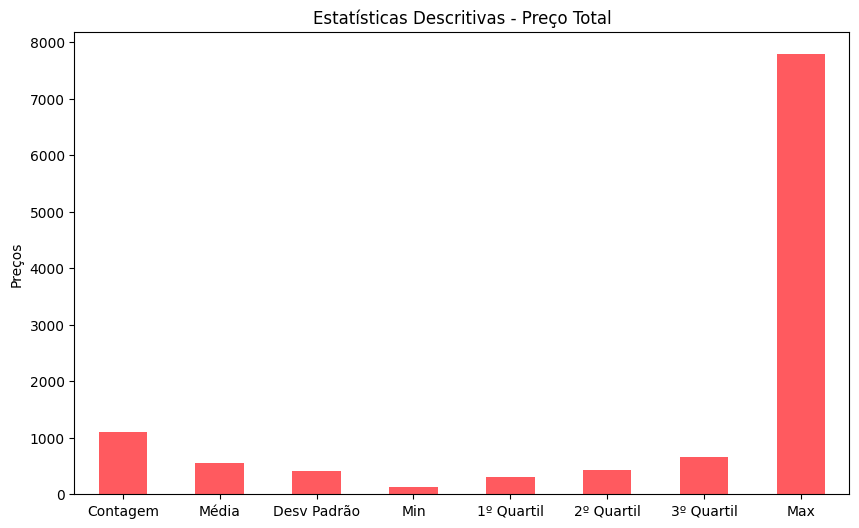

In [ ]:
# Plotagem - gráfico de barras
descricao = df['preço_total'].describe()
descricao.plot(kind='bar', figsize=(10, 6), color='#FF5A5F')

# Configurações do gráfico
plt.title('Estatísticas Descritivas - Preço Total')
plt.ylabel('Preços')
plt.xticks(rotation=0)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['Contagem', 'Média', 'Desv Padrão', 'Min', '1º Quartil', '2º Quartil', '3º Quartil', 'Max'])

# Exibição do gráfico
plt.show()

# Análise geral do atributo tipo_quarto

In [ ]:
#verificando tamanho do atributo
df.groupby(['tipo_quarto']).size()

tipo_quarto
Apt/casa inteira        538
Quarto compartilhado      6
Quarto privado          559
dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['tipo_quarto'].nunique()

3

(array([0, 1, 2]),
 [Text(0, 0, 'Apt/casa inteira'),
  Text(1, 0, 'Quarto compartilhado'),
  Text(2, 0, 'Quarto privado')])

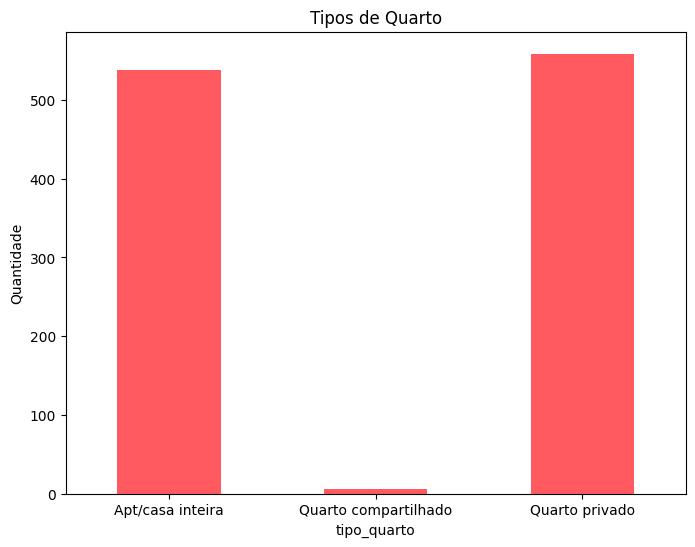

In [ ]:
# Plotagem - gráfico de barras
contagem = df.groupby(['tipo_quarto']).size()
contagem.plot(kind='bar', figsize=(8, 6), color='#FF5A5F')

# Configurações do gráfico
plt.title('Tipos de Quarto')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

# Análise geral do atributo quarto_privativo

In [ ]:
#Verificando tamanho do atributo
df.groupby(['quarto_privativo']).size()

quarto_privativo
False    544
True     559
dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['quarto_privativo'].nunique()

2

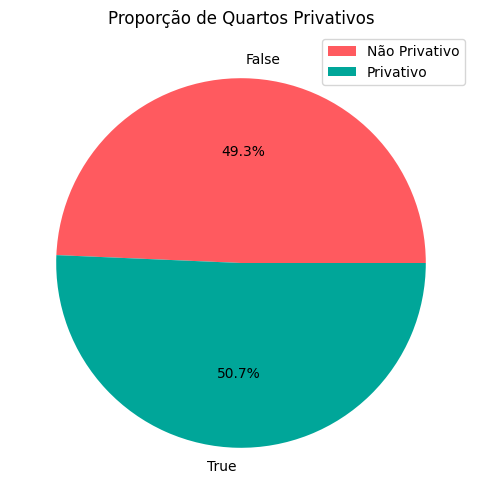

In [ ]:
# Plotagem - gráfico de pizza
contagem = df.groupby(['quarto_privativo']).size()
contagem.plot(kind='pie', figsize=(6, 6), colors=['#FF5A5F', '#00A699'], autopct='%1.1f%%')

# Configurações do gráfico
plt.title('Proporção de Quartos Privativos')
plt.legend(labels=['Não Privativo', 'Privativo'])

# Exibição do gráfico
plt.show()

# Análise geral do atributo Superhost

In [ ]:
#Verificando tamanho do atributo
df.groupby(['Superhost']).size()

Superhost
False    780
True     323
dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['Superhost'].nunique()


2

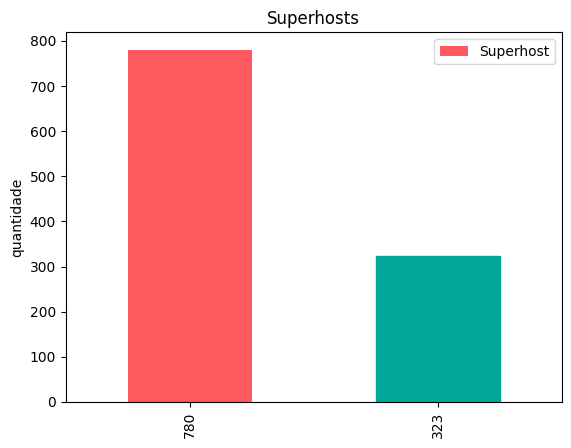

In [ ]:
#Plotagem - gráfico de barras
dados = [780, 323]
index = ['780', '323']

# Criação da série
serie = pd.Series(dados, index=index)

ax = serie.plot(kind='bar', color=['#FF5A5F'])
ax.get_children()[1].set_color('#00A699')
# Configurações do gráfico
plt.title('Superhosts')
plt.ylabel('quantidade')
plt.legend(['Superhost'])

# Exibição do gráfico
plt.show()

# Análise geral do atributo nota_limpeza

In [ ]:
df

,preço_total,tipo_quarto,quarto_privativo,Superhost,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metrô,índice de atração do local do anúncio,índice de restaurantes do local do anúncio
0,194.03,Quarto privado,True,False,10,93,1,5.02,2.54,78.69,98.25
1,344.25,Quarto privado,True,False,8,85,1,0.49,0.24,631.18,837.28
2,264.10,Quarto privado,True,False,9,87,1,5.75,3.65,75.28,95.39
3,433.53,Quarto privado,True,False,9,90,2,0.38,0.44,493.27,875.03
4,485.55,Quarto privado,True,True,10,98,1,0.54,0.32,552.83,815.31
...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,Apt/casa inteira,False,False,10,100,1,2.38,1.44,181.20,225.30
1099,233.64,Quarto privado,True,False,10,90,1,4.72,0.32,108.02,134.78
1100,317.06,Quarto privado,True,False,10,92,1,0.60,0.75,440.48,625.95
1101,1812.86,Apt/casa inteira,False,False,8,84,5,1.94,0.39,257.95,336.59


In [ ]:
df.groupby(['nota_limpeza']).size()

nota_limpeza
4       2
5       1
6       9
7      11
8      87
9     334
10    659
dtype: int64

In [ ]:
df['nota_limpeza'].nunique()

7

In [ ]:
#Verificando algumas estatísticas descritiva - média, desvio padrão, valor mínimo, valor máximo e quartis.
df['nota_limpeza'].describe()

count   1103.00
mean       9.46
std        0.80
min        4.00
25%        9.00
50%       10.00
75%       10.00
max       10.00
Name: nota_limpeza, dtype: float64

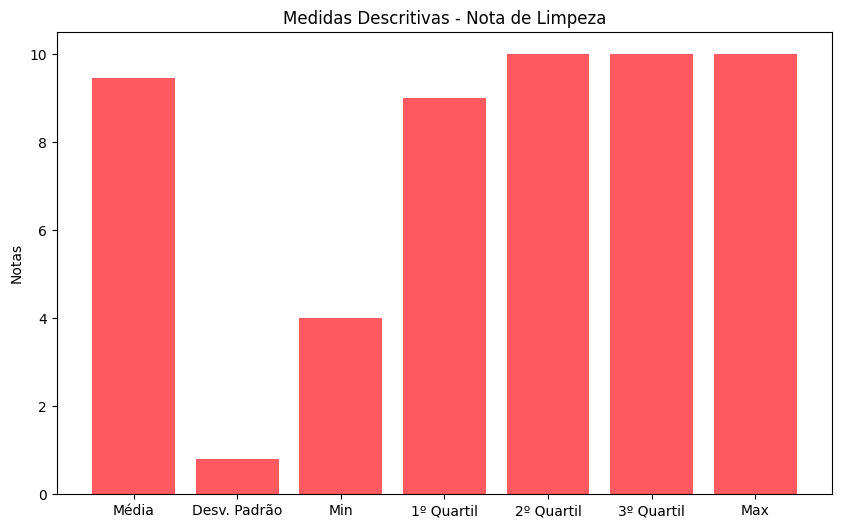

In [ ]:
# Plotagem do gráfico de barras
valores = [9.46, 0.80, 4.00, 9.00, 10.00, 10.00, 10.00]

# Rótulos para as estatísticas
rotulos = ['Média', 'Desv. Padrão', 'Min', '1º Quartil', '2º Quartil', '3º Quartil', 'Max']
plt.figure(figsize=(10, 6))
plt.bar(rotulos, valores, color='#FF5A5F')

# Configurações do gráfico
plt.title('Medidas Descritivas - Nota de Limpeza')
plt.ylabel('Notas')

# Exibição do gráfico
plt.show()

# Análise geral do atributo satisfação

In [ ]:
#Análise geral da coluna satisfacao
df.groupby(['satisfacao']).size()

satisfacao
20       1
47       1
60       3
65       1
70       1
73       1
74       1
75       2
76       1
77       1
78       3
80      24
81       3
82       5
83       6
84      11
85      13
86      14
87      21
88      30
89      20
90      51
91      30
92      48
93      67
94      69
95      82
96     121
97      95
98     122
99      65
100    190
dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['satisfacao'].nunique()

32

In [ ]:
#Análise geral da coluna satifacao
df['satisfacao'].describe()

count   1103.00
mean      94.36
std        6.09
min       20.00
25%       92.00
50%       96.00
75%       98.00
max      100.00
Name: satisfacao, dtype: float64

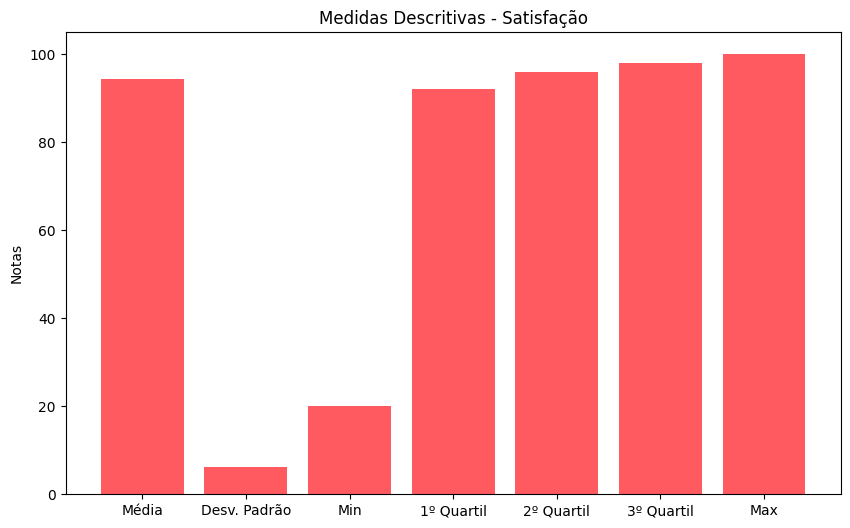

In [ ]:
# Plotagem - gráfico de barras
valores = [94.36, 6.09, 20.00, 92.00, 96.00, 98.00, 100.00]

# Rótulos para as estatísticas
rotulos = ['Média', 'Desv. Padrão', 'Min', '1º Quartil', '2º Quartil', '3º Quartil', 'Max']
plt.figure(figsize=(10, 6))
# Plotagem do gráfico de barras
plt.bar(rotulos, valores, color='#FF5A5F')

# Configurações do gráfico
plt.title('Medidas Descritivas - Satisfação')
plt.ylabel('Notas')

# Exibição do gráfico
plt.show()

# Análise geral do atributo quartos

In [ ]:
#Verificando tamanho do atributo
df.groupby(['quartos']).size()

quartos
0     83
1    719
2    218
3     74
4      7
5      2
dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['quartos'].nunique()

6

In [ ]:
#Verificando medidas estatísticas descritivas - média, desvio padrão, valor mínimo, valor máximo e quartis.
df['quartos'].describe()

count   1103.00
mean       1.28
std        0.74
min        0.00
25%        1.00
50%        1.00
75%        2.00
max        5.00
Name: quartos, dtype: float64

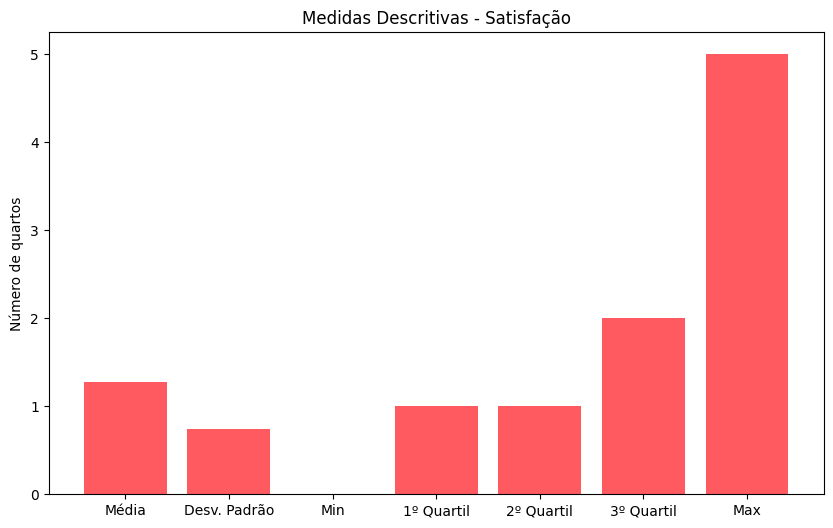

In [ ]:
valores = [1.28, 0.74, 0.00, 1.00, 1.00, 2.00, 5.00]

# Rótulos para as estatísticas
rotulos = ['Média', 'Desv. Padrão', 'Min', '1º Quartil', '2º Quartil', '3º Quartil', 'Max']
plt.figure(figsize=(10, 6))
# Plotagem do gráfico de barras
plt.bar(rotulos, valores, color='#FF5A5F')

# Configurações do gráfico
plt.title('Medidas Descritivas - Satisfação')
plt.ylabel('Número de quartos')

# Exibição do gráfico
plt.show()

# Análise geral do distância centro

In [ ]:
#Verificando tamanho do atributo
df.groupby(['distancia_centro']).size()

distancia_centro
0.02     1
0.10     1
0.11     1
0.12     1
0.14     1
        ..
10.90    1
10.97    1
11.04    1
11.04    1
11.19    1
Length: 1103, dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['distancia_centro'].nunique()

1103

In [ ]:
df['distancia_centro'].describe()

count   1103.00
mean       2.84
std        2.12
min        0.02
25%        1.30
50%        2.34
75%        3.65
max       11.19
Name: distancia_centro, dtype: float64

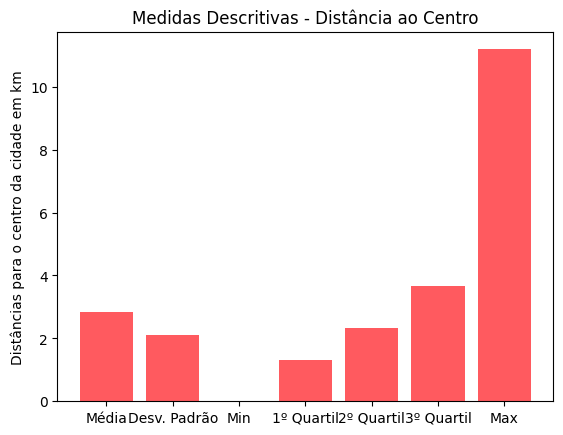

In [ ]:
# Plotagem - gráfico de barras
valores = [2.84, 2.12, 0.02, 1.30, 2.34, 3.65, 11.19]

# Rótulos para as estatísticas
rotulos = ['Média', 'Desv. Padrão', 'Min', '1º Quartil', '2º Quartil', '3º Quartil', 'Max']

plt.bar(rotulos, valores, color='#FF5A5F')

# Configurações do gráfico
plt.title('Medidas Descritivas - Distância ao Centro')
plt.ylabel('Distâncias para o centro da cidade em km')

# Exibição do gráfico
plt.show()

# Análise geral do atributo distância metrô

In [ ]:
#Verificando tamanho do atributo
df.groupby(['distancia_metrô']).size()

distancia_metrô
0.04    1
0.04    1
0.05    1
0.05    1
0.05    1
       ..
4.03    1
4.10    1
4.14    1
4.14    1
4.41    1
Length: 1103, dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['distancia_metrô'].nunique()

1103

In [ ]:
#Verificando medidas estatísticas descritivas - média, desvio padrão, valor mínimo, valor máximo e quartis.
df['distancia_metrô'].describe()

count   1103.00
mean       1.09
std        0.84
min        0.04
25%        0.46
50%        0.86
75%        1.51
max        4.41
Name: distancia_metrô, dtype: float64

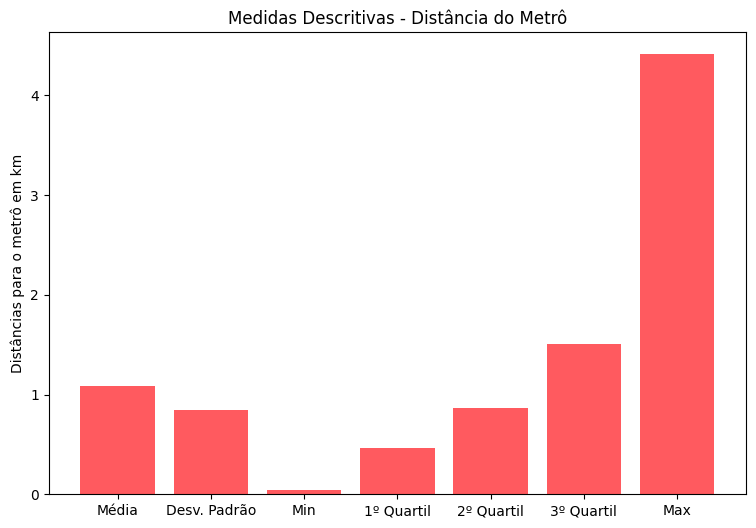

In [ ]:
# Plotagem - gráfico de barras
valores = [1.09, 0.84, 0.04, 0.46, 0.86, 1.51, 4.41]

# Rótulos para as estatísticas
rotulos = ['Média', 'Desv. Padrão', 'Min', '1º Quartil', '2º Quartil', '3º Quartil', 'Max']
plt.figure(figsize=(9, 6))

plt.bar(rotulos, valores, color='#FF5A5F')

# Configurações do gráfico
plt.title('Medidas Descritivas - Distância do Metrô')
plt.ylabel('Distâncias para o metrô em km')

# Exibição do gráfico
plt.show()

# Análise geral do atributo índice de atração do local do anúncio

In [ ]:
#Verificando tamanho do atributo
df.groupby(['índice de atração do local do anúncio']).size()

índice de atração do local do anúncio
40.93      1
41.28      1
41.35      1
41.64      1
42.01      1
          ..
1171.70    1
1238.47    1
1502.55    1
1861.00    1
1888.55    1
Length: 1103, dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['índice de atração do local do anúncio'].nunique()

1103

In [ ]:
#Verificando medidas estatísticas descritivas - média, desvio padrão, valor mínimo, valor máximo e quartis.
df['índice de atração do local do anúncio'].describe()

count   1103.00
mean     271.01
std      197.05
min       40.93
25%      127.91
50%      208.18
75%      386.44
max     1888.55
Name: índice de atração do local do anúncio, dtype: float64

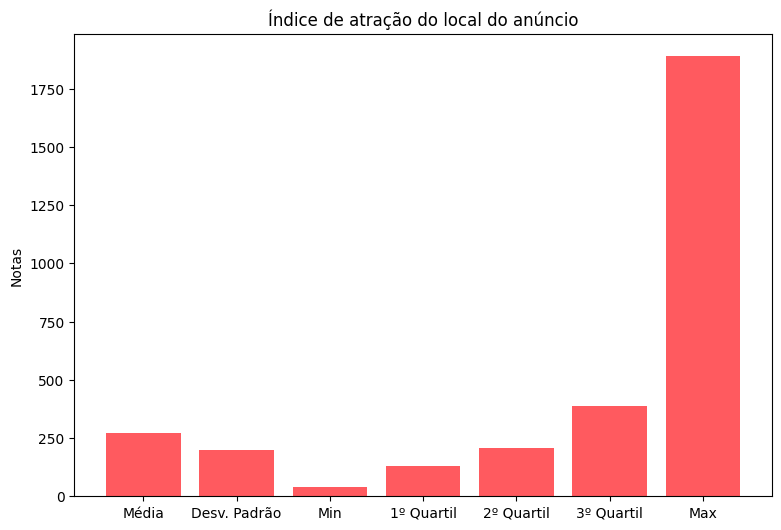

In [ ]:
# Plotagem - gráfico de barras
valores = [271.01, 197.05, 40.93, 127.91, 208.18, 386.44, 1888.55]

# Rótulos para as estatísticas
rotulos = ['Média', 'Desv. Padrão', 'Min', '1º Quartil', '2º Quartil', '3º Quartil', 'Max']
plt.figure(figsize=(9, 6))
plt.bar(rotulos, valores, color='#FF5A5F')

# Configurações do gráfico
plt.title('Índice de atração do local do anúncio')
plt.ylabel('Notas')

# Exibição do gráfico
plt.show()

# Análise geral do atributo índice de restaurantes do local do anúncio

In [ ]:
#Verificando tamanho do atributo
df.groupby(['índice de restaurantes do local do anúncio']).size()

índice de restaurantes do local do anúncio
50.88      1
51.29      1
51.39      1
51.80      1
52.24      1
          ..
1077.01    1
1144.94    1
1147.15    1
1402.15    1
1435.10    1
Length: 1103, dtype: int64

In [ ]:
#Verificando quantos valores únicos existem na coluna
df['índice de restaurantes do local do anúncio'].nunique()

1103

In [ ]:
#Verificando medidas estatísticas descritivas - média, desvio padrão, valor mínimo, valor máximo e quartis.
df['índice de restaurantes do local do anúncio'].describe()

count   1103.00
mean     341.54
std      236.61
min       50.88
25%      163.47
50%      260.26
75%      469.29
max     1435.10
Name: índice de restaurantes do local do anúncio, dtype: float64

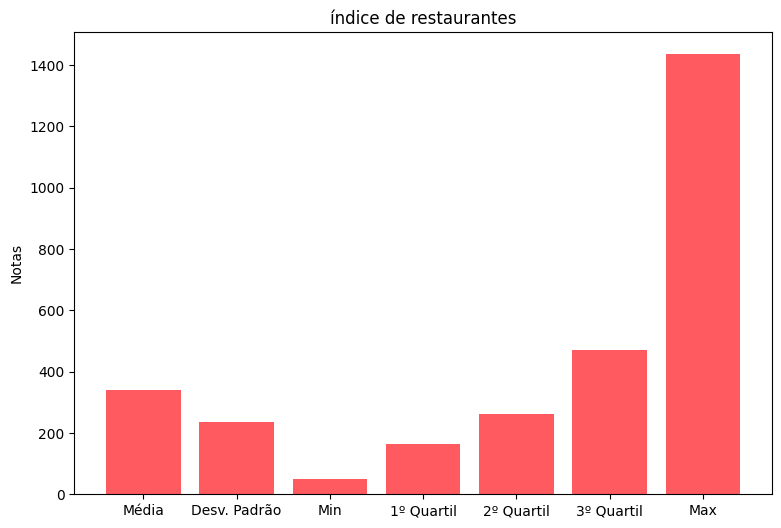

In [ ]:
# Plotagem do gráfico de barras
valores = [341.54, 236.61,50.88, 163.47, 260.26, 469.29, 1435.10]

# Rótulos para as estatísticas
rotulos = ['Média', 'Desv. Padrão', 'Min', '1º Quartil', '2º Quartil', '3º Quartil', 'Max']
plt.figure(figsize=(9, 6))

plt.bar(rotulos, valores, color='#FF5A5F')

# Configurações do gráfico
plt.title('índice de restaurantes')

plt.ylabel('Notas')

# Exibição do gráfico
plt.show()

# **Encontrando relações entre os atributos**

In [ ]:
#Verificando Dataframe
df.sample (9)

,preço_total,tipo_quarto,quarto_privativo,Superhost,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metrô,índice de atração do local do anúncio,índice de restaurantes do local do anúncio
718,251.92,Quarto privado,True,False,8,85,1,2.53,0.34,268.85,353.79
684,374.94,Quarto privado,True,False,9,92,1,0.30,0.24,737.81,759.78
315,399.32,Apt/casa inteira,False,False,10,98,1,2.75,1.65,157.96,201.00
356,399.55,Apt/casa inteira,False,False,10,96,2,1.99,1.92,225.30,281.90
555,221.45,Quarto privado,True,False,10,92,1,10.15,1.11,44.77,55.78
1072,847.84,Quarto privado,True,True,10,100,1,1.57,0.67,642.43,621.73
757,589.83,Apt/casa inteira,False,False,10,100,1,1.45,1.53,253.23,323.50
163,292.46,Quarto privado,True,True,9,87,1,4.72,0.73,112.56,138.73
354,436.11,Apt/casa inteira,False,False,10,95,0,3.39,0.44,130.10,163.59


**Relação entre os atributos Preço Total e Satisfação**

In [ ]:
#criação de filtro
filtro = (df['satisfacao'] >= 90) & (df['distancia_centro'] <= 1) & (df['distancia_metrô'] <= 0.5) & (df['Superhost'] == True) & (df['preço_total'] >= 400)
df_filtrado = df[filtro]

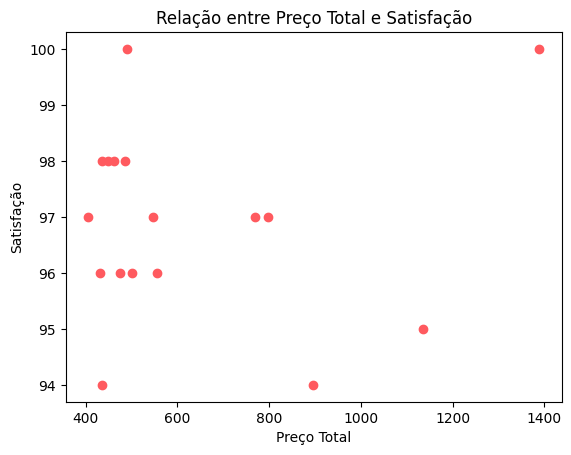

In [ ]:
# Gráfico de dispersão para visualizar a relação entre a satisfação e o preço total
plt.scatter(df_filtrado['preço_total'], df_filtrado['satisfacao'], color='#FF5A5F')
plt.title('Relação entre Preço Total e Satisfação')
plt.xlabel('Preço Total')
plt.ylabel('Satisfação')
plt.show()

**Relação entre os atributos Preço Total e distância do Metrô**

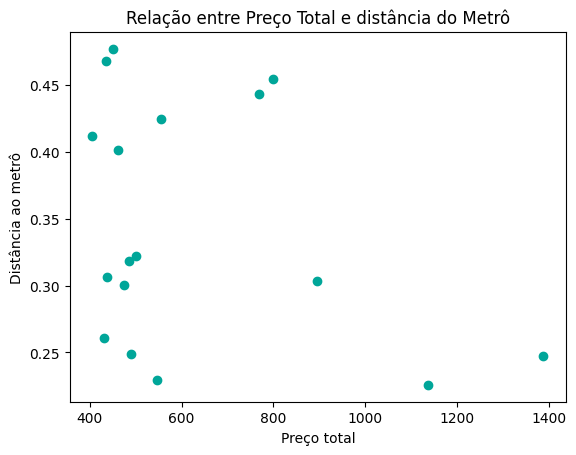

In [ ]:
# Gráfico de dispersão para visualizar a relação entre a distância ao centro e a distância ao metrô
plt.scatter(df_filtrado['preço_total'], df_filtrado['distancia_metrô'], color='#00A699')
plt.title('Relação entre Preço Total e distância do Metrô')
plt.xlabel('Preço total')
plt.ylabel('Distância ao metrô')
plt.show()

**Relação entre os atributos Preço Total e distância do centro**

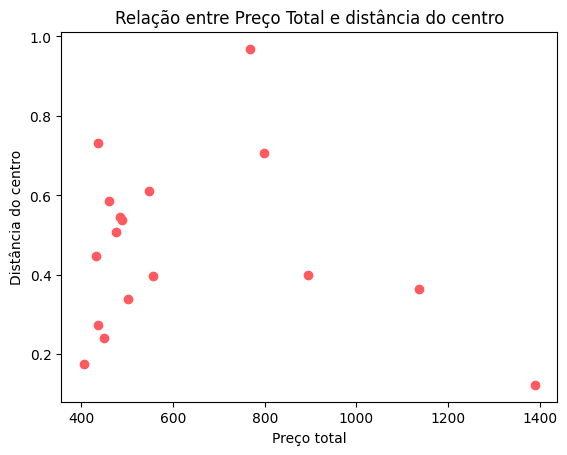

In [ ]:
# Gráfico de dispersão para visualizar a relação entre a distância ao centro e a distância ao metrô
plt.scatter(df_filtrado['preço_total'], df_filtrado['distancia_centro'], color='#FF5A5F')
plt.title('Relação entre Preço Total e distância do centro')
plt.xlabel('Preço total')
plt.ylabel('Distância do centro')
plt.show()

 **Relação entre os atributos Satisfação e Nota_limpeza**

In [ ]:
# Medias das notas de limpeza
df['nota_limpeza'].mean()

9.461468721668178

In [ ]:
#criação de filtro
filtro2 = (df['satisfacao'] >= 90) & (df['nota_limpeza'] <= 9) #& (df['distancia_metrô'] <= 0.5) & (df['Superhost'] == True) & (df['preço_total'] >= 400)
df_filtrado2 = df[filtro2]

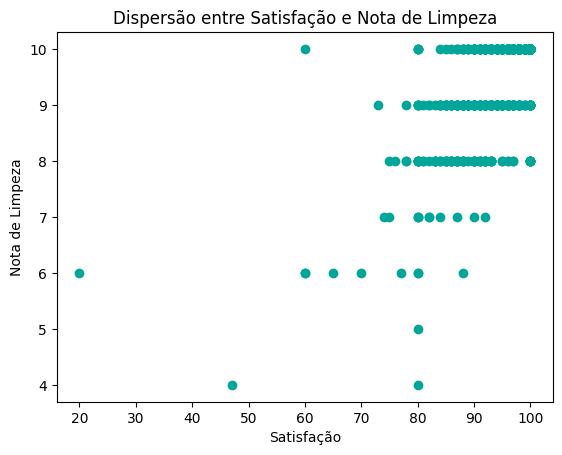

In [ ]:
# Gráfico de dispersão para visualizar a relação entre a satisfação e nota de limpeza
plt.scatter(df['satisfacao'], df['nota_limpeza'], color='#00A699')

# Configurações do gráfico
plt.title('Dispersão entre Satisfação e Nota de Limpeza')
plt.xlabel('Satisfação')
plt.ylabel('Nota de Limpeza')

# Exibição do gráfico
plt.show()

In [ ]:
#Bakcup de segurança
dfback4 = df.copy()

## **Conclusão**

De acordo com os dados disponibilizados, foi feita a análise considerando o atributo de preço total. Foi identificado no gráfico de dispersão que os hóspedes que pagam na faixa de 400-600 tem a tendência de avaliarem com notas mais altas. Ou seja, as avaliações com notas mais baixas são mais comuns entre os hóspedes que pagam acima de 600$.

Esse fator está fortemente relacionado com as distâncias. As acomodações que ficam mais perto do centro da cidade e de estações do metrô são as que apresentam preços mais baixos, o que leva em consideração que há uma maior facilidade de locomoção e permite aos hóspedes maior aproveitamento de atrações turísticas da região. O que nos leva a analisar que de acordo com esse fatores de proximidade do centro e metrô são os que colaboram para que o anúncio tenha um alto índice de atratividade, sendo assim, elevando seu posicionamento nas buscas realizadas na plataforma.

Ressalto também que outro fator importante são que as notas de satisfação também estão intensamente relacionadas às notas de limpeza. Um critério que não pode ser ignorado pelos anfitriões, pois a limpeza das acomodações é algo que garante a satisfação dos hóspedes.

Sendo assim, é identificado como oportunidade que haja mais investimento dos anfitriões em acomodações com preços acessíveis e que sejam próximas do centro da cidade, estações de metrôs e de outros meios de transportes mais utilizados no dia a dia. Há a possibilidade de inserir nos anúncios informações sobre meios de transportes alternativos que são disponibilizados na região, podendo assim até surgir possíveis parcerias, principalmente de publicidade dos serviços oferecidos de ambos os lados.


Já como possíveis ameaças aos negócios, foi verificado - com base nos artigos  informados como fonte de pesquisa- que é preciso levar em consideração alguns pontos sobre regulamentações governamentais e restrições em algumas cidades.
Os artigos informam que há a possibilidade de regulamentações mais rigoras em relação aos alugueis do Airbnb. Levando em consideração questões sobre licenciamento, impostos. Foi informado também que um grupo de cidades européias se uniram para que a Airbnb disponibilizasse os dados de sues clientes (anfitriões) para que haja um maior controle do fluxo de turistas e proteção dos moradares dos locais mais procurados pelos hóspedes. Esse ponto seria prejuducial para a Airbnb, pois a empresa cobra uma taxa de reserva e com esses dados dos anfitriões divulgados, tornaria o acesso hóspede - anfitrião mais acessível, o que pode gerar perda de receita para a empresa.

Outro ponto levantado é que algumas cidades estão impondo restrições ao funcionamento do Airbnb, que pode incluir restrições ao limite de diárias em que a acomodação pode ser alugada. O que pode reduzir o número de propriedades disponibilizada em alguns destinos, o que pode afetar a oferta e demanda.
